In [ ]:
#Social_Network_Ads.csv

**Importing the libraries**

In [1]:
import pandas as pd 
import numpy  as np
import seaborn as sns
import matplotlib.pyplot as plt


**Importing the dataset**

In [2]:
data = pd.read_csv('/content/Social_Network_Ads.csv')
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
del data['User ID']
     

In [4]:
data.dtypes
     

Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [5]:
data.drop_duplicates()
data.shape
     

(400, 4)

In [6]:
data.describe()
     

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [7]:
IQR = data.Age.quantile(0.75) - data.Age.quantile(0.25)
upper_threshold = data.Age.quantile(0.75) + (IQR*1.5)
lower_threshold = data.Age.quantile(0.25) - (IQR*1.5)
lower_threshold,upper_threshold

(5.375, 70.375)

In [8]:
IQR = data.EstimatedSalary.quantile(0.75) - data.EstimatedSalary.quantile(0.25)
upper_threshold = data.EstimatedSalary.quantile(0.75) + (IQR*1.5)
lower_threshold = data.EstimatedSalary.quantile(0.25) - (IQR*1.5)
lower_threshold,upper_threshold

(-24500.0, 155500.0)

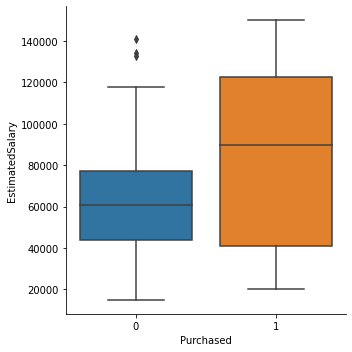

In [9]:
sns.catplot(data=data, x="Purchased", y="EstimatedSalary", kind="box")
     

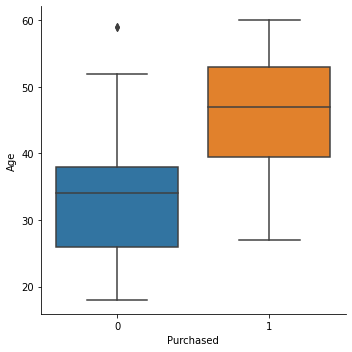

In [10]:
sns.catplot(data=data, x="Purchased", y="Age", kind="box")

**Splitting the dataset into the Training set and Test set**

In [11]:
from sklearn.model_selection import train_test_split
X = data[['Age','EstimatedSalary']]
y = data['Purchased']

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

**Feature Scaling**

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
     

**Fitting Decision Tree Classification to the Training set**

In [13]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=2,)
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [14]:
y_pred = dt.predict(x_test)
y_pred
     

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0])

**Predicting the Test set results**

In [15]:
from sklearn.metrics import roc_auc_score,classification_report

print("Auroc score :", roc_auc_score(y_test,y_pred))
print("classification_report :", classification_report(y_test,y_pred))

Auroc score : 0.8983516483516483
classification_report :               precision    recall  f1-score   support

           0       0.94      0.90      0.92        52
           1       0.83      0.89      0.86        28

    accuracy                           0.90        80
   macro avg       0.89      0.90      0.89        80
weighted avg       0.90      0.90      0.90        80



**Making the Confusion Matrix**

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_pred,y_test)
cm
     

array([[47,  3],
       [ 5, 25]])

<AxesSubplot:>

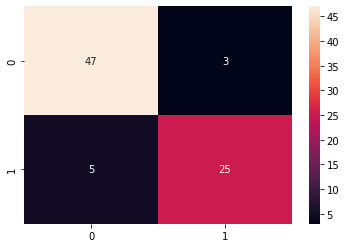

In [17]:

import seaborn as sns
sns.heatmap(cm, annot=True)

**Visualising the Training set results**

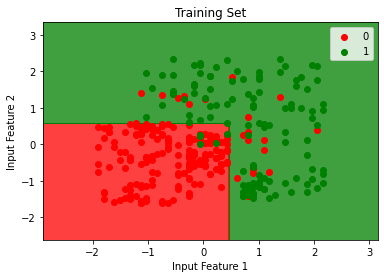

In [18]:
from matplotlib.colors import ListedColormap  

X1, X2 = np.meshgrid(np.arange(start = x_train[:, 0].min() - 1, stop = x_train[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_train[:, 1].min() - 1, stop = x_train[:, 1].max() + 1, step = 0.01))

Z = dt.predict(np.array([X1.ravel(), X2.ravel()]).T)
Z = Z.reshape(X1.shape)

plt.contourf(X1, X2, Z, alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_train)):
    plt.scatter(x_train[y_train == j, 0], x_train[y_train == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)

plt.title('Training Set')
plt.xlabel('Input Feature 1')
plt.ylabel('Input Feature 2')
plt.legend()
plt.show()

**Visualising the Test set results**

<AxesSubplot:>

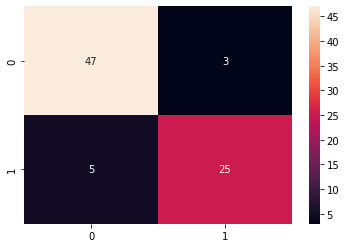

In [19]:
import seaborn as sns
sns.heatmap(cm, annot=True)

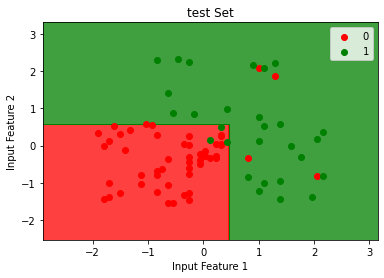

In [20]:
X1, X2 = np.meshgrid(np.arange(start = x_test[:, 0].min() - 1, stop = x_test[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_test[:, 1].min() - 1, stop = x_test[:, 1].max() + 1, step = 0.01))

Z = dt.predict(np.array([X1.ravel(), X2.ravel()]).T)
Z = Z.reshape(X1.shape)

plt.contourf(X1, X2, Z, alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_train)):
    plt.scatter(x_test[y_test == j, 0], x_test[y_test == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)

plt.title('test Set')
plt.xlabel('Input Feature 1')
plt.ylabel('Input Feature 2')
plt.legend()
plt.show()